# Data Exploration

### Imports and Set-up

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# import the data
df = pd.read_csv("../00_data/base_data.csv", parse_dates=["Date"])

# drop 2 Mo and 4 Mo
df.drop(["1 Mo", "2 Mo", "4 Mo", "20 Yr", "30 Yr"], axis=1, inplace=True)

### Base Data Statistics

In [2]:
df.shape

(8466, 9)

In [3]:
# show na values by column
df.isna().sum()

Date     0
3 Mo     4
6 Mo     1
1 Yr     1
2 Yr     1
3 Yr     1
5 Yr     1
7 Yr     1
10 Yr    1
dtype: int64

In [4]:
# how many rows have an na value?
df.isna().any(axis=1).sum()

4

In [5]:
# show the years of the na values
df[df.isna().any(axis=1)].Date.dt.year.value_counts()

Date
2008    3
2010    1
Name: count, dtype: int64

**Worked down to a data set where we only have to drop 4 rows. To do so, several time horizons were cut.**

### Clean-up Data

In [6]:
# show number of duplicated dates
df.Date.duplicated().sum()

0

In [7]:
# drop na values
df.dropna(inplace=True)

In [8]:
# show resulting size
df.shape

(8462, 9)

### Visualize Resulting Data

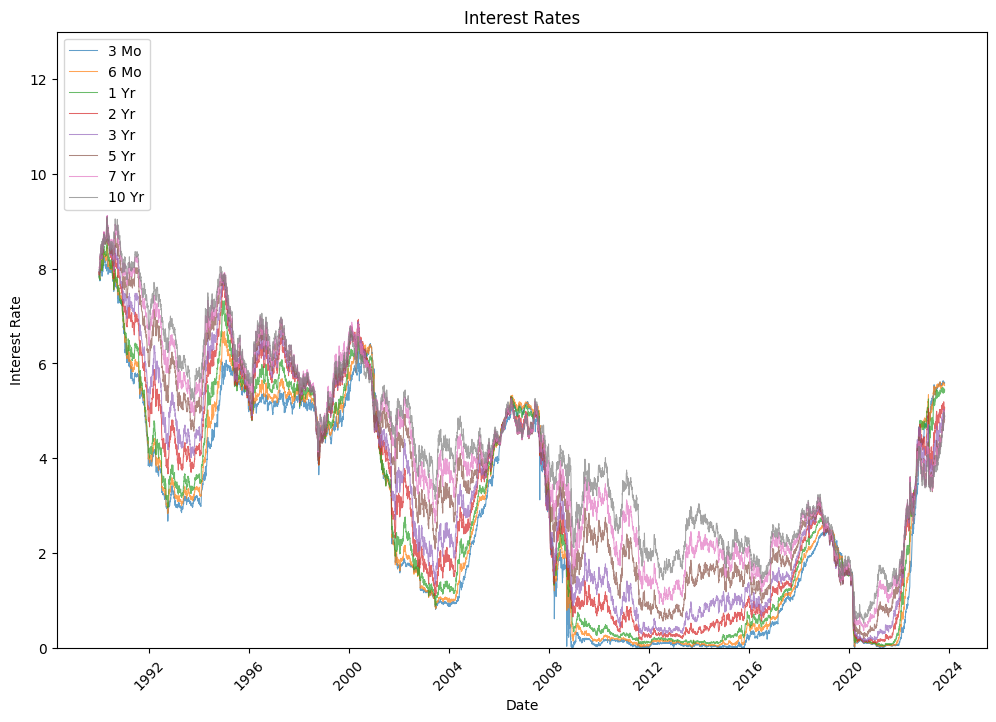

In [9]:
# Plot the remaining data
plt.figure(figsize=(12, 8))

# loop through the non-date columns
for i in range(1, len(df.columns)):
    plt.plot(df["Date"], df.iloc[:, i], label=df.columns[i], alpha=0.7, linewidth=0.75)

# Set the X axis label to be more readable
plt.xticks(rotation=45)

# make the X axis year only
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))

# set ylim
plt.ylim(0, 13)

# set the title and axis labels
plt.title("Interest Rates")
plt.xlabel("Date")
plt.ylabel("Interest Rate")

# set the legend
plt.legend(loc="upper left")

# show
plt.show()

### Save Data

In [10]:
# save data to csv
df.to_csv("../00_data/clean_data.csv", index=False)